In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model 

import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [2]:
model = load_model('best_model_cropped.h5')

In [3]:
testDir  = "/home/trojan/Desktop/dimentia/dataset/data_2categ/data_PGGAN/test/AD"
CATEGORIES = ['AD', 'CN']
folders_AD = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
folders_CN = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

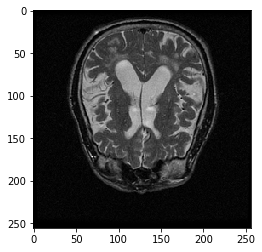

In [4]:
for folder in folders_AD:
    PATH = os.path.join(testDir, folder)
    for img in os.listdir(PATH):
        img_array = cv2.imread(os.path.join(PATH,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break 

In [5]:
def prepare(filepath):
    IMG_SIZE = 256
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    #new_array = cv2.normalize(new_array , None, 0, 1, cv2.NORM_MINMAX)
    new_array = new_array.astype('float32') / 255
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [6]:
patient = 1
AD_patient = 0
CN_patient = 0

for folder in folders_AD:
    PATH = os.path.join(testDir, folder)
    count_AD = 0
    count_CN = 0
    print('Testing for patient {}'.format(patient))
    for img in os.listdir(PATH):
        prediction = model.predict([prepare(os.path.join(PATH,img))])
        #prediction = (model.predict([prepare(os.path.join(PATH,img))])>0.5).astype("int32")
        predicted_class_indice=np.argmax(prediction,axis=-1)
        predicted_class = CATEGORIES[int(predicted_class_indice)]
        print(predicted_class_indice)
        #print(prediction)
        print(predicted_class)
        if predicted_class == 'AD':
            count_AD += 1
        else:
            count_CN += 1
    
    print(f"AD votes = {count_AD}")
    print(f"CN votes = {count_CN}")
    
    if count_AD >= count_CN:
        print('Patient belongs to AD')
        AD_patient += 1
    else:
        print('Patient belongs to CN')
        CN_patient += 1
    
    patient += 1
    
accuracy = (AD_patient/len(folders_AD))*100
print(f"AD Accuracy is {accuracy}%")
    
    
        

Testing for patient 1
[0]
AD
[1]
CN
[1]
CN
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[1]
CN
AD votes = 3
CN votes = 7
Patient belongs to CN
Testing for patient 2
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
AD votes = 10
CN votes = 0
Patient belongs to AD
Testing for patient 3
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 7
Patient belongs to CN
Testing for patient 4
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[1]
CN
[1]
CN
[1]
CN
AD votes = 2
CN votes = 7
Patient belongs to CN
Testing for patient 5
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[0]
AD
[0]
AD
[1]
CN
[0]
AD
[0]
AD
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[0]
AD
[1]
CN
[1]
CN
[0]
AD
[1]
CN
[0]
AD
[0]
AD
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[0]
AD
[1]
CN
[1]
CN
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[0]
AD
[0]
AD
[1]
CN
[1]
CN
[0]
AD
AD votes = 18
CN votes = 30
Patient belongs to CN
Testing for patient 6
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0]
AD
[0

In [7]:
testDir  = "/home/trojan/Desktop/dimentia/dataset/data_2categ/data_PGGAN/test/CN"

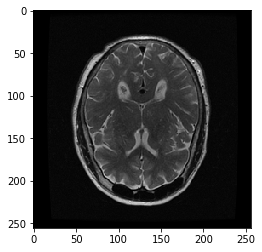

In [8]:
for folder in folders_CN:
    PATH = os.path.join(testDir, folder)
    for img in os.listdir(PATH):
        img_array = cv2.imread(os.path.join(PATH,img) ,cv2.IMREAD_COLOR)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break 

In [9]:
patient = 1
AD_patient = 0
CN_patient = 0

for folder in folders_CN:
    PATH = os.path.join(testDir, folder)
    count_AD = 0
    count_CN = 0
    print('Testing for patient {}'.format(patient))
    for img in os.listdir(PATH):
        prediction = model.predict([prepare(os.path.join(PATH,img))])
        #prediction = (model.predict([prepare(os.path.join(PATH,img))])>0.5).astype("int32")
        predicted_class_indice=np.argmax(prediction,axis=-1)
        predicted_class = CATEGORIES[int(predicted_class_indice)]
        print(predicted_class_indice)
        #print(prediction)
        print(predicted_class)
        if predicted_class == 'AD':
            count_AD += 1
        else:
            count_CN += 1
    
    print(f"AD votes = {count_AD}")
    print(f"CN votes = {count_CN}")
    
    if count_AD > count_CN:
        print('Patient belongs to AD')
        AD_patient += 1
    else:
        print('Patient belongs to CN')
        CN_patient += 1
    
    patient += 1
    
accuracy = (CN_patient/len(folders_CN))*100
print(f"CN Accuracy is {accuracy}%")
    
    
        

Testing for patient 1
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 8
Patient belongs to CN
Testing for patient 2
[0]
AD
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 1
CN votes = 8
Patient belongs to CN
Testing for patient 3
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 8
Patient belongs to CN
Testing for patient 4
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 7
Patient belongs to CN
Testing for patient 5
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 8
Patient belongs to CN
Testing for patient 6
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 8
Patient belongs to CN
Testing for patient 7
[1]
CN
[0]
AD
[0]
AD
[1]
CN
[0]
AD
[0]
AD
[0]
AD
[1]
CN
[1]
CN
AD votes = 5
CN votes = 4
Patient belongs to AD
Testing for patient 8
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
[1]
CN
AD votes = 0
CN votes = 9
